<a href="https://colab.research.google.com/github/sir-hadi/My-AI-ML-DS-Projects/blob/main/Telco%20Customer%20Churn/Telco_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the data
the source of the data is from kaggle, here is the link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sir-hadi/My-AI-ML-DS-Projects/main/Telco%20Customer%20Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# TotalCharges should be numerical, lets change that real quick
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# and change SeniorCitizen into a boolean value
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
df.shape

(7043, 21)

# Explore and analyze the data (EDA)
a fast way to get to know the data with minimal code is using pandas profiling a library that creates a simple dashboard about our dataset. but if we want to plot or view something with more complexity then we must do code it ourself, because pandas profiling is a tool just to get started in my eyes.

we will use pandas profiling now and see what insightful information we can find 




before that here is some description of the data from kaggle, we should read this

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

## Pandas Profiling

In [ ]:
!pip install pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 105.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 122.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 34.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=598e30c9717591f1f71275584a0d70e6bd348456e33478561f4d073c4579a63f
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Un

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Telco Churn Dataset')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Insight from Pandas Profiling

- first thing first, our y value or our target feature is imbalance, we can fix this with...
___

- SeniorCitizen is a bit imbalance, not as imbalance as phoneService thou
- MonthlyCharges has a lot of correlated value with others variables
- line the services feature has a lot of correlation with others services values, this would maybe lead to there being some package service, so if a person buys package A then that person would have some a certain set of packages. and there could be more than one packages and the customer would likely to choose from those packages meaning there is lil to much differences on theses features hence there is correlation, so if a person have a certain value in PhoneService, then there is a high chance that this feature can determine what value is in InternetService, cause of the packages people chose, this makes sense that MonthlyCharges has a high correlation with theses services, cause if Package A has X price and certain set of service, then package B would shows some certain price and package again, if there is 5 packages then the data values will be shown to that packages
- we could do a clustering to just prove this and see what will be shown, this is interesting, but if we would to work inside that company we can just ask what are the packages or a have the data engineer extract a column name packages, IF we are not working for this company then maybe clustering seems somewhat beneficial to us, we can talk about this more later on
- a another thing is that TotalCharges has a high cardinality, meaning not all MonthlyCharges are the same, meaning the hypothesis of there is packages could false, we will investigate this more
- **NEVERMIND!!!, MonthlyCharges was an object, after i change it to a numerical, it's highly overall correlated with  MonthlyCharges**
- and there is 11 missing values in TotalCharges, we can just maybe drop em, but let's look first how that 11 row looks like
- tenure is highly overall correlated with Contract

___

- the histogram of tenure shows that there is early customer that churn in the early month, or the first month, we have to dig deeper inside the people behavior that does churn in early month
- but there is a lot of person who status longer, customer with more than 70 months should be analyze as well, finding the behavior of person who stays long (high tenure value, does not need to be over 70 months)

___

- services can be split into two, phone services and internet services, (write down each column corresponding to those types)
- the value of no services has similar count value across the services columns (InternetService,PhoneService, and such)
- phone and multiple line has a count value of 682 on it
- while as for the internet service columns has 1526 count values
- the most service with "yes" value is MultipleLines, second is StreamingMovies





## More Analysis

from the pandas insigth we can have hypothesis and insight that we can show and prove. beside from pandas, there are a couple of things we can see in more detail that pandas profiling cant show, here is a list that we try to find understanding with the help of matplotlib and seaborn:
- what kind of feature value does of people that are churn?
- what are the values on features with high correlation value?
> - 'PhoneService' and 'MultipleLines' feature has a correlation value of 1.0, we can completely eliminate it but we want to show it that the values are correleted, we will plot both of them
> - InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', and 'StreamingMovies' have a correlation value of 0.7, which is pretty high, we will see them group togther in a couple of visulization



In [ ]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

to make things even cause the churn value is imbalance, we will cap the number of not churn to be equal with the number of churn data

In [ ]:
df_a = pd.concat([df[df.Churn == 'No'].sample(df[df.Churn == 'Yes'].shape[0]),df[df.Churn == 'Yes']])
# df_a = df

In [ ]:
df_a.Churn.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

In [ ]:
bool_col = ['gender','SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']
numerical_col = ['tenure','MonthlyCharges', 'TotalCharges']
categorical_col = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

### Creating a column which hold the number of service people use

this column we will create is simple and hopefuly can give us some insight more about our data. its more on feature engineering side but we do this now so we can also see some 

### People Churn vs Not Churn Value

[]

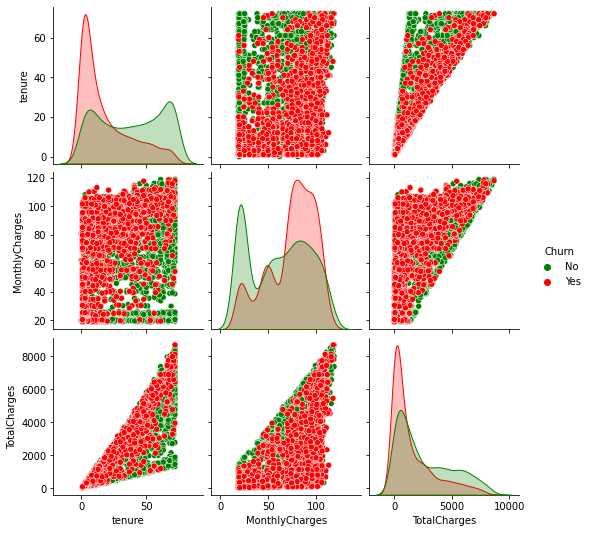

In [ ]:
sns.pairplot(df_a[numerical_col + ['Churn']], hue="Churn",palette=["green", "red"])
plt.plot()

from this pair plot, we can see some correlation between some variables like tenure and TotalCharges or MonthlyCharges and tenure. what is interesting here is that we found somewhat of a behavior that proves our hypothesis before when we viewed our pandas profiling dashboard.

which is the number of people that have a high tenure value is less to churn, we can see this in the tenure KDE plot, that tenure above 50 has little churn count. This proves our one hypothesis on tenure

but people whose tenure is still small have a higher probability to be churned (or the count of churn is higher than not churn)

on MonthlyCharges has shown the opposite on tenure KDE plot, people with high monlthyCharges have a higher probability to be churn

on TotalCharges it makes sense because higher TotalCharges means higher tenure, a smaller TotalCharges means a smaller tenure, and smaller tenure like we see before has a higher probability to be churn


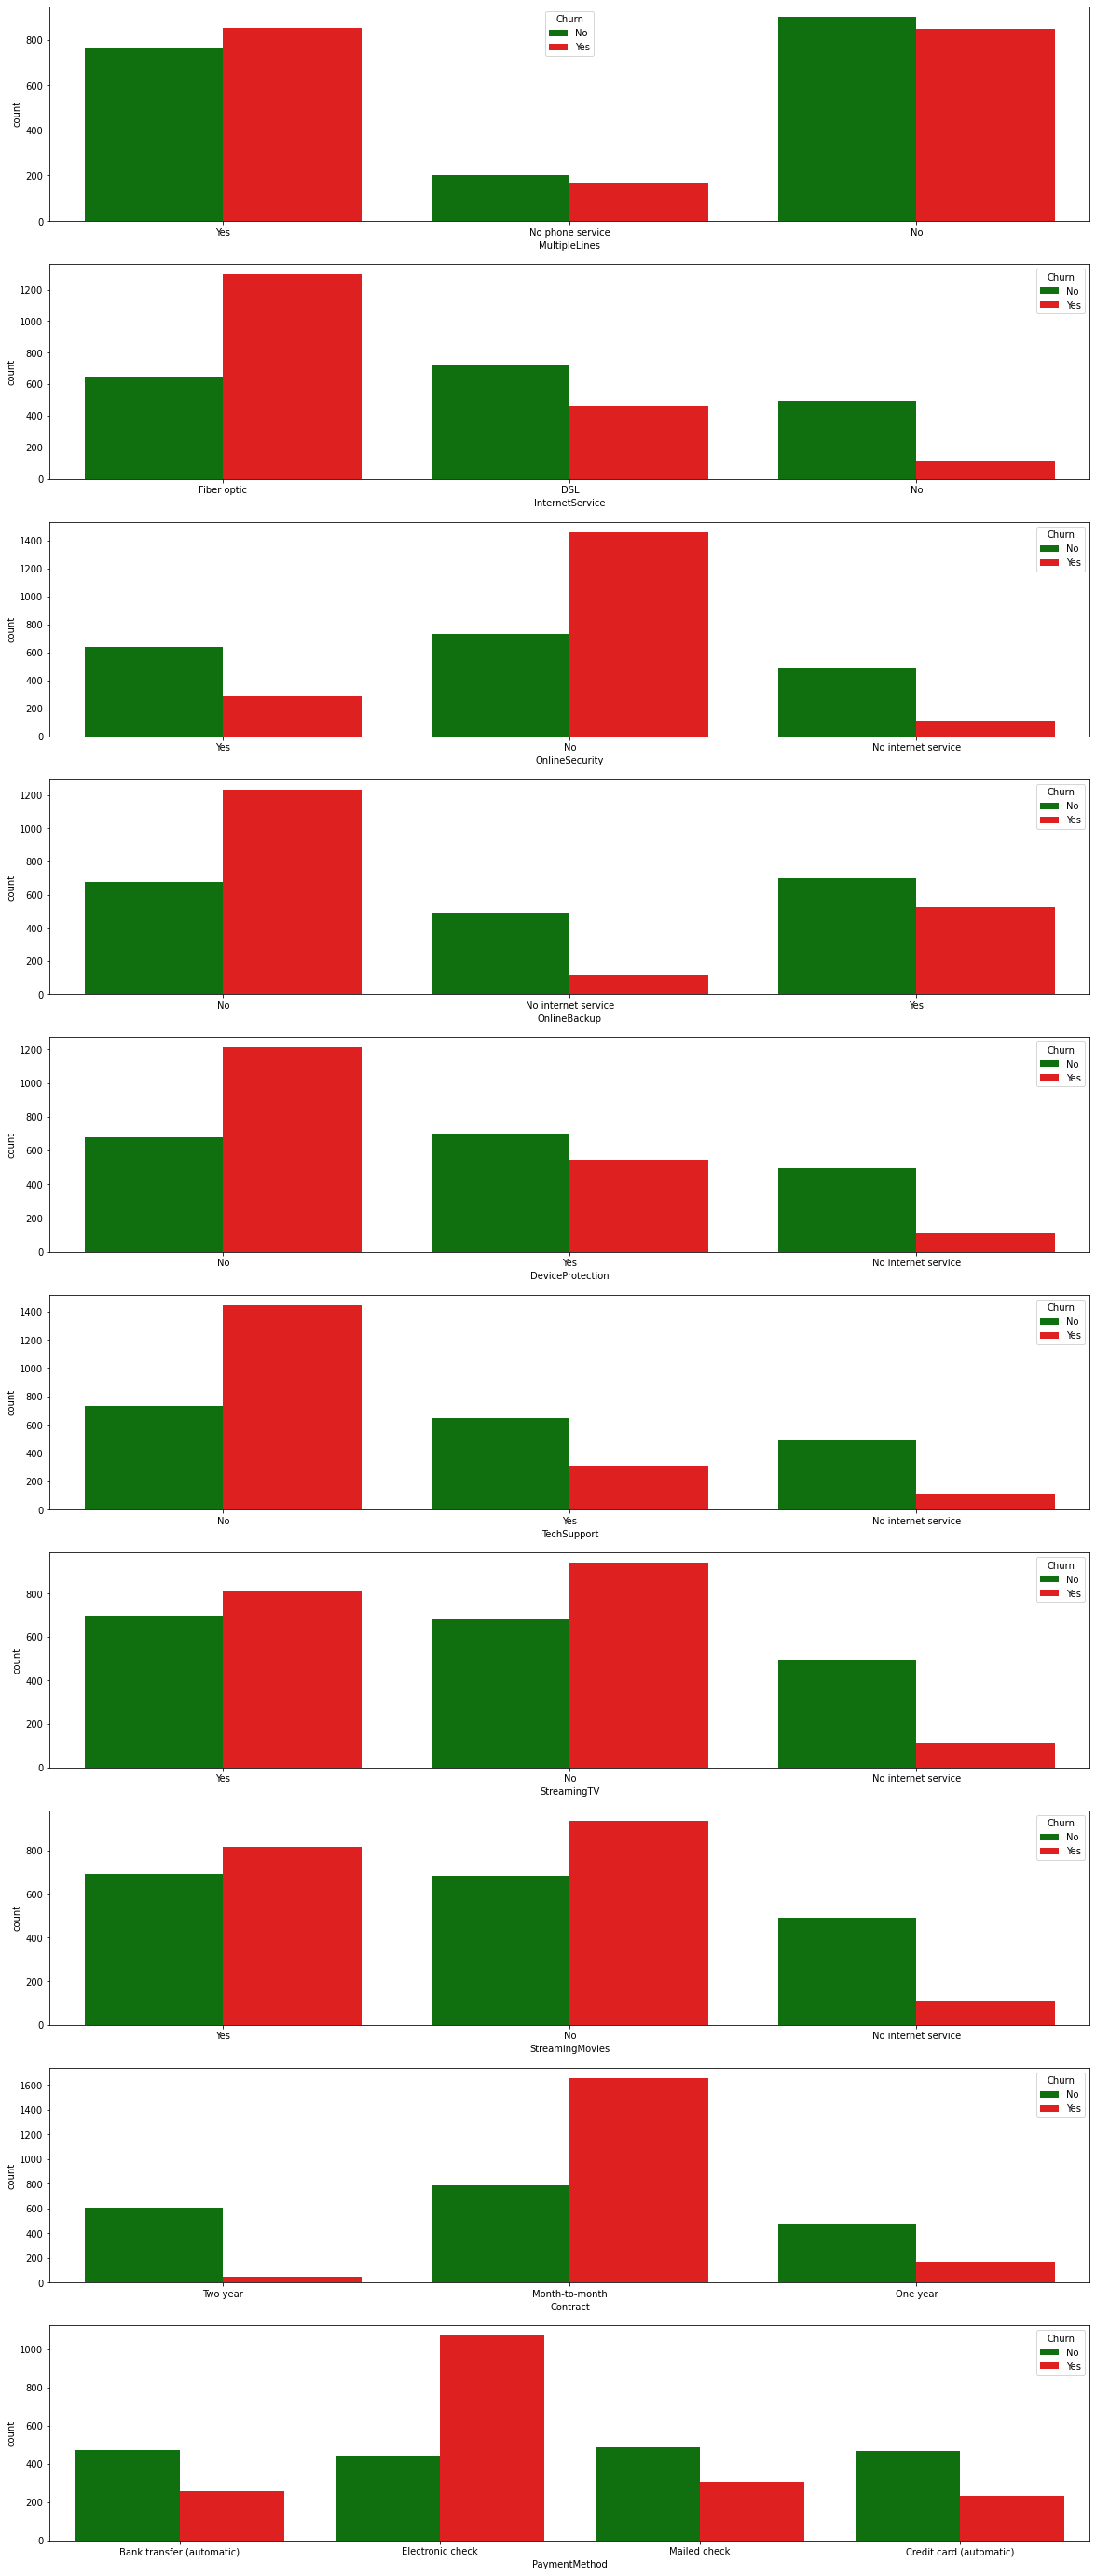

In [ ]:
target_col = categorical_col
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.countplot(x=df_a[target_col[i]],hue=df_a['Churn'],palette=["green", "red"],ax=axs[i])
plt.show()

TODO : WRITE SUMMARY

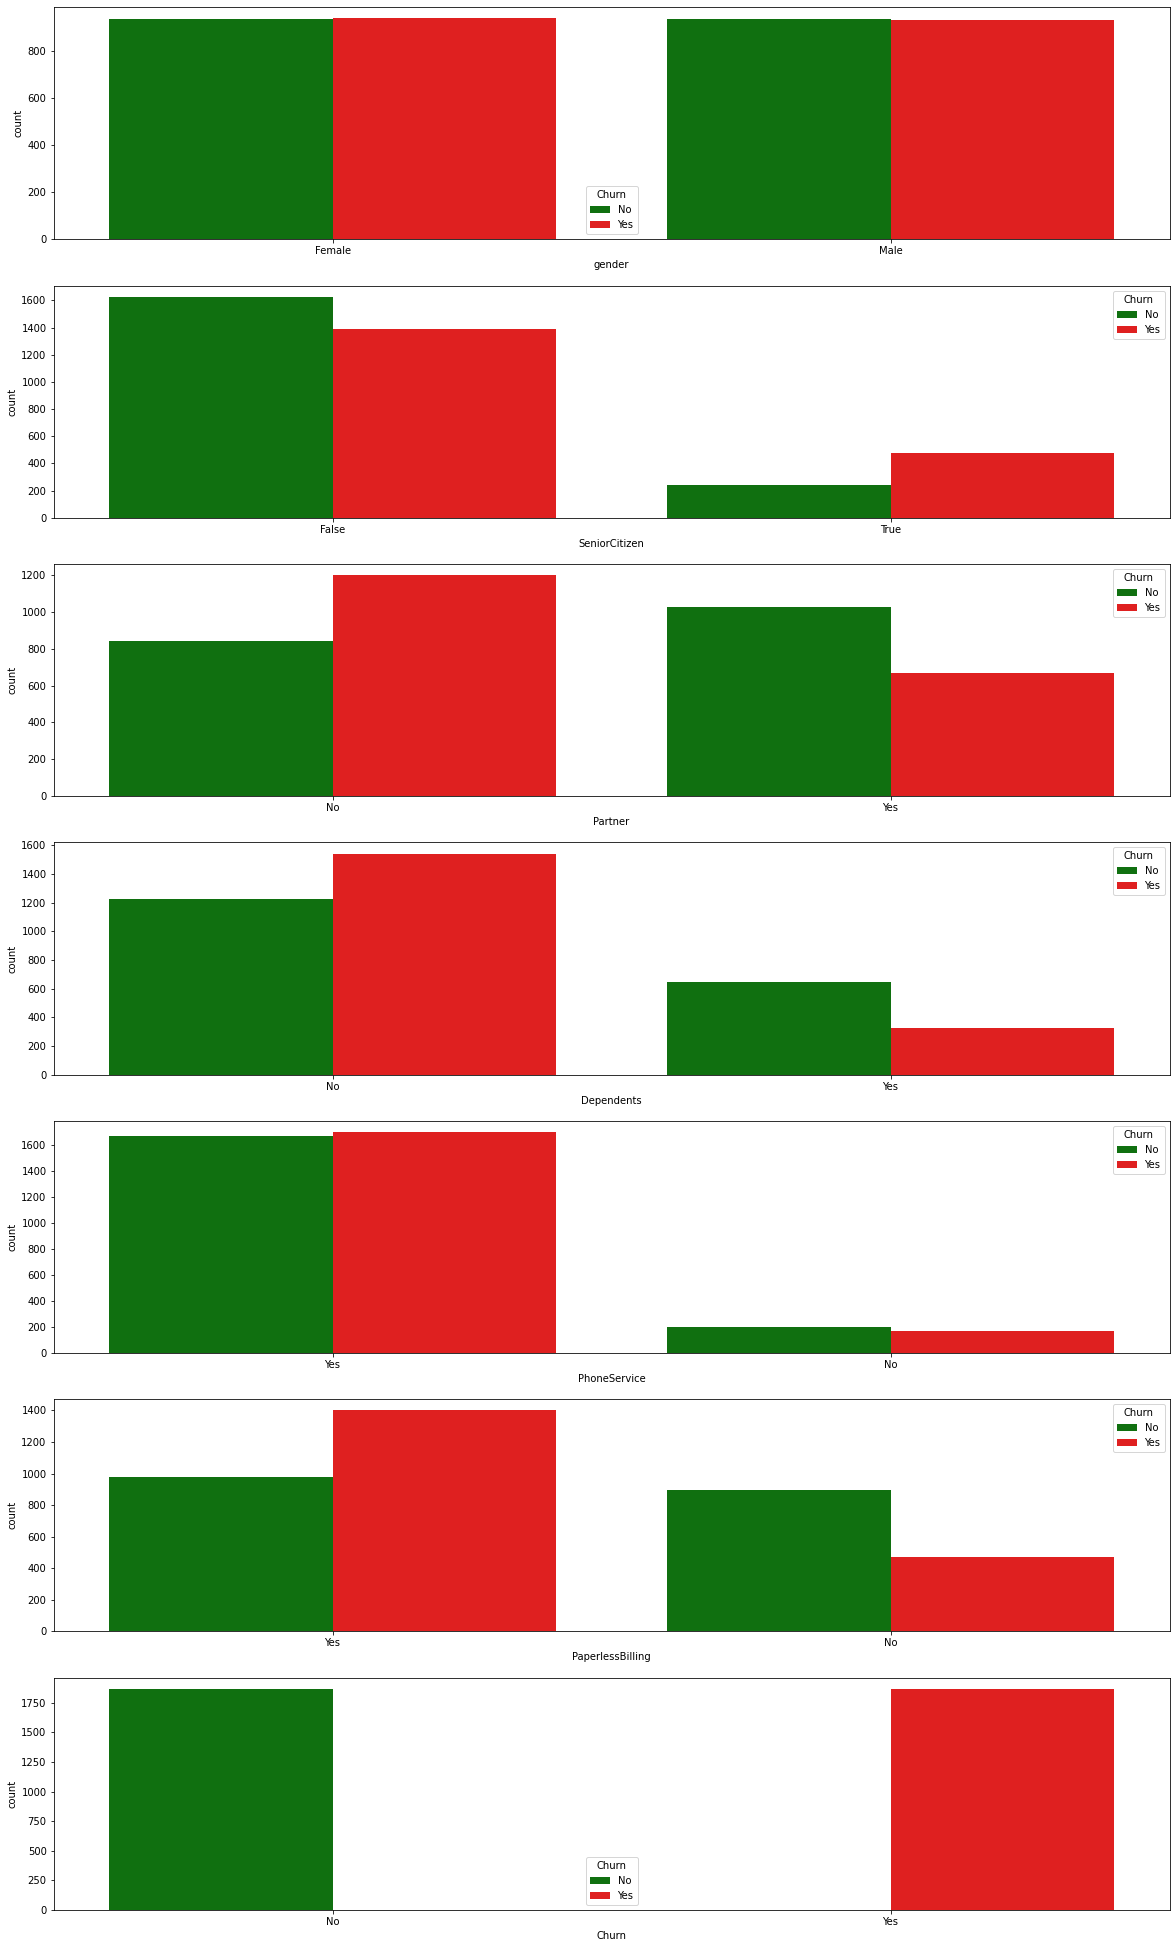

In [ ]:
target_col = bool_col
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.countplot(x=df_a[target_col[i]],hue=df_a['Churn'],palette=["green", "red"],ax=axs[i])
plt.show()

### Looking more on the numerical data

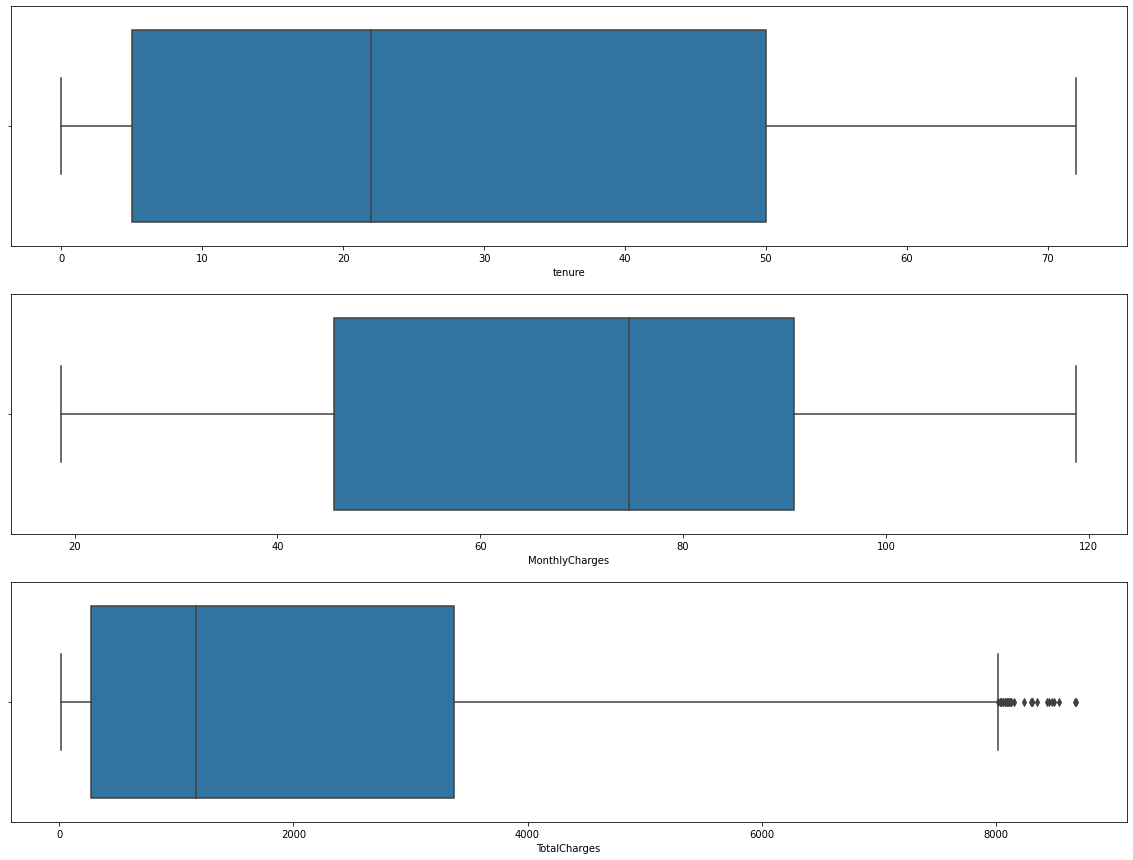

In [ ]:
target_col = numerical_col
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.boxplot(x=df_a[target_col[i]],ax=axs[i])
plt.show()

In [ ]:
df_a.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3738.0,28.073569,24.274481,0.00,5.00,22.000,50.0000,72.00
MonthlyCharges,3738.0,68.031875,28.760297,18.70,45.55,74.675,90.9375,118.75
TotalCharges,3733.0,2079.147857,2214.029518,18.85,272.15,1164.300,3371.7500,8684.80


with the percentile range we can devide them up into some categorical value, like high tenure or low tenure or mid tenure
or more simply we can use the mean to divede them

there should be more advance teqniueq

that teqniueq is qcut

In [ ]:
df_a['tenure_class'] = pd.qcut(df_a.tenure, 4, labels=["new", "mid", "aging", "old"])
df_a['MonthlyCharges_class'] = pd.qcut(df_a.MonthlyCharges, 4, labels=["low", "mid","mid-high", "high"])
df_a['TotalCharges_class'] = pd.qcut(df_a.TotalCharges, 4, labels=["low", "mid","mid-high", "high"])

In [ ]:
df_a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_class,MonthlyCharges_class,TotalCharges_class
6180,0201-MIBOL,Female,True,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85,No,old,high,high
1037,4581-LNWUM,Female,False,No,No,13,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.15,649.40,No,mid,mid,mid
5530,9644-KVCNC,Female,False,No,No,66,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),92.15,6056.90,No,old,high,high
6373,0943-ZQPXH,Male,False,Yes,Yes,44,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),92.95,4122.90,No,aging,high,high
4925,5966-EMAZU,Male,False,Yes,No,64,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,108.50,6880.85,No,old,high,high


### People with High and Low Tenure

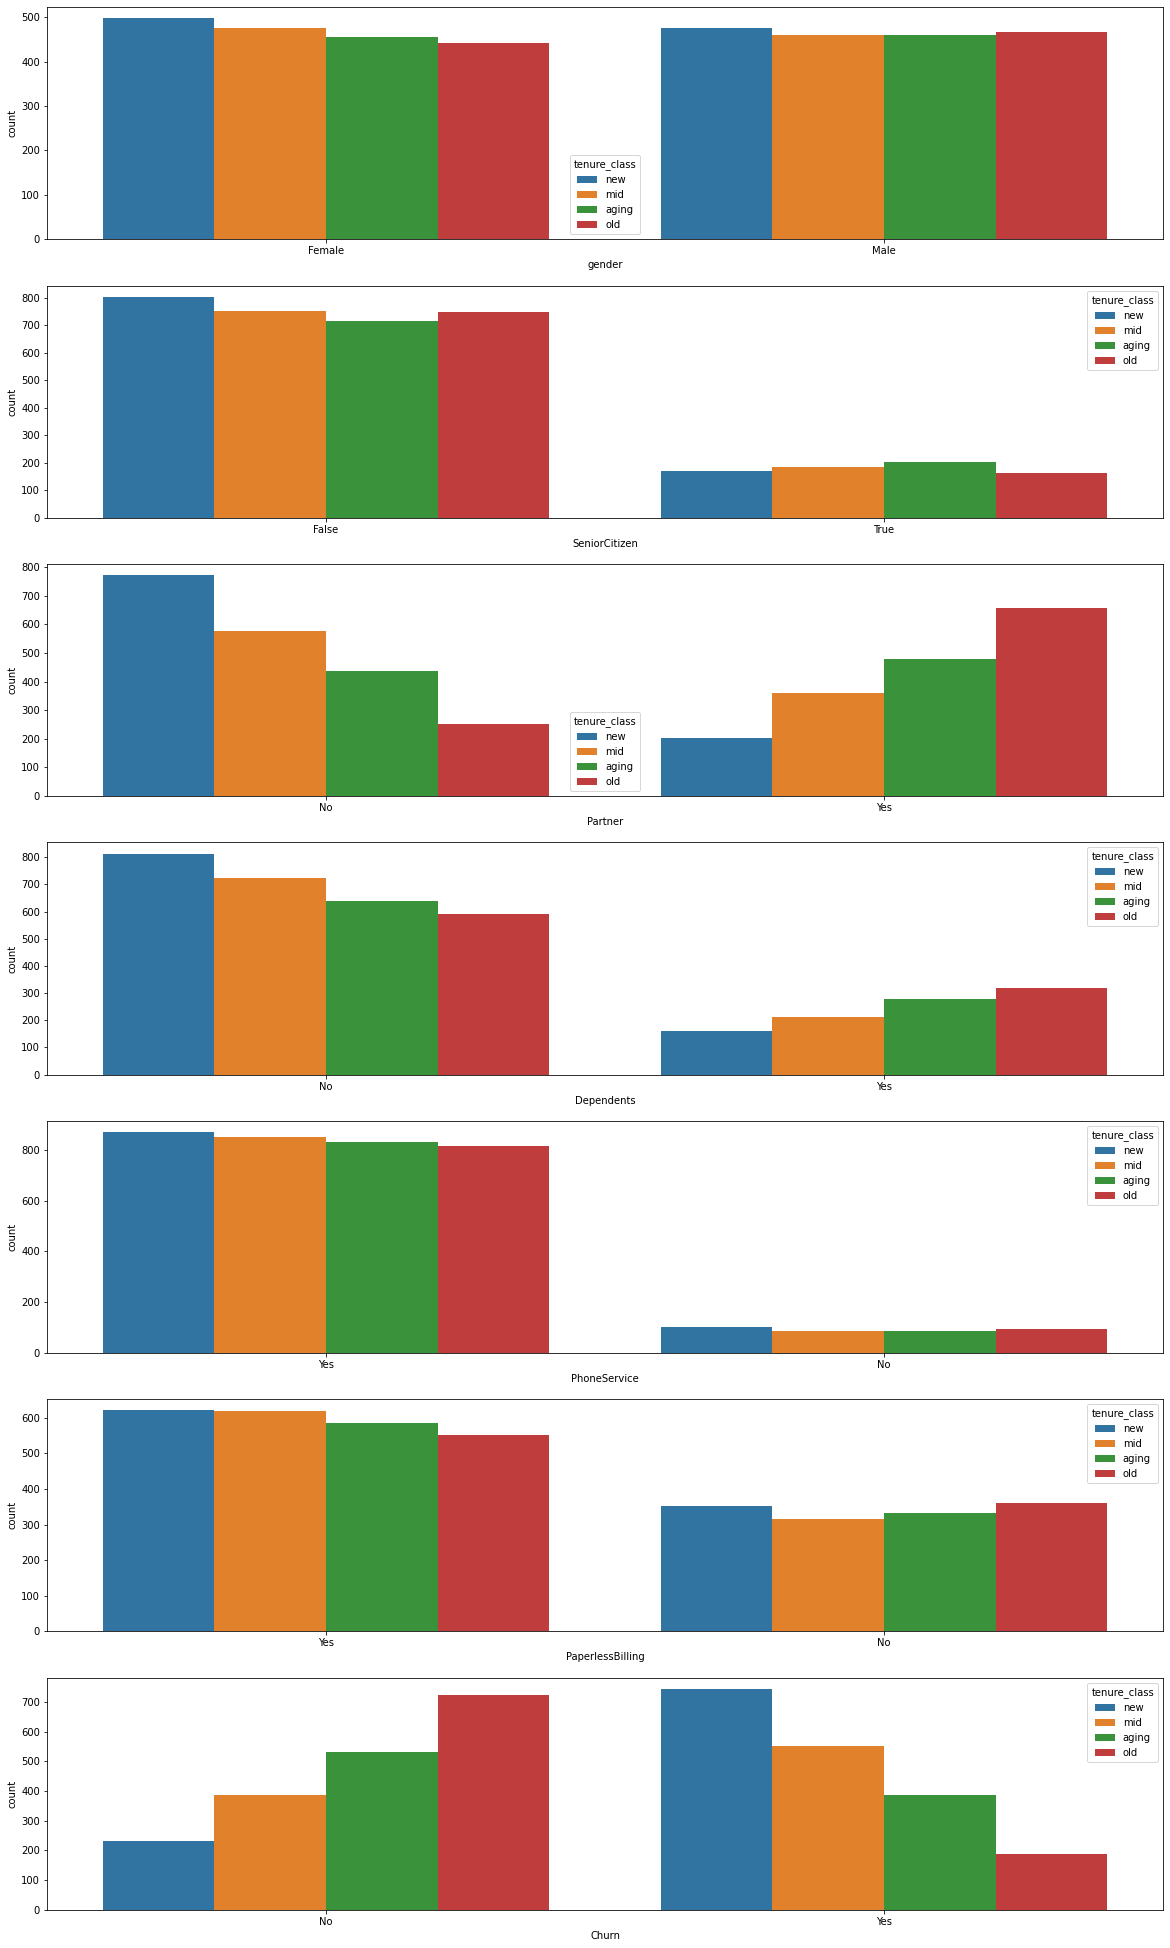

In [ ]:
target_col = bool_col
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.countplot(x=df_a[target_col[i]],hue=df_a['tenure_class'],ax=axs[i])
plt.show()

[]

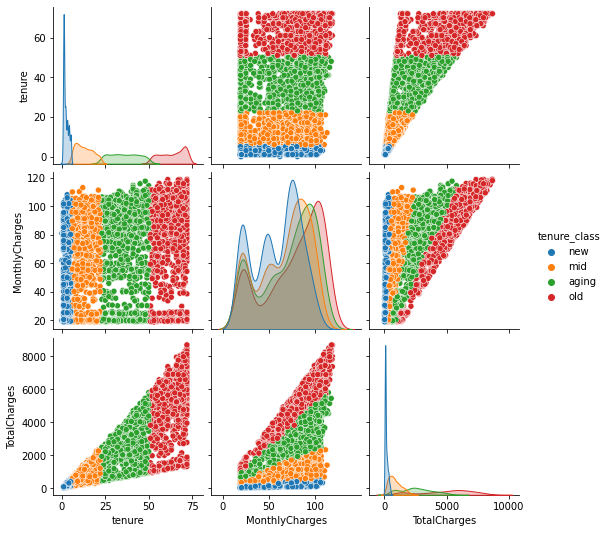

In [ ]:
sns.pairplot(df_a[numerical_col + ['tenure_class']], hue="tenure_class")
plt.plot()

### People with High and Low MontlyCharges

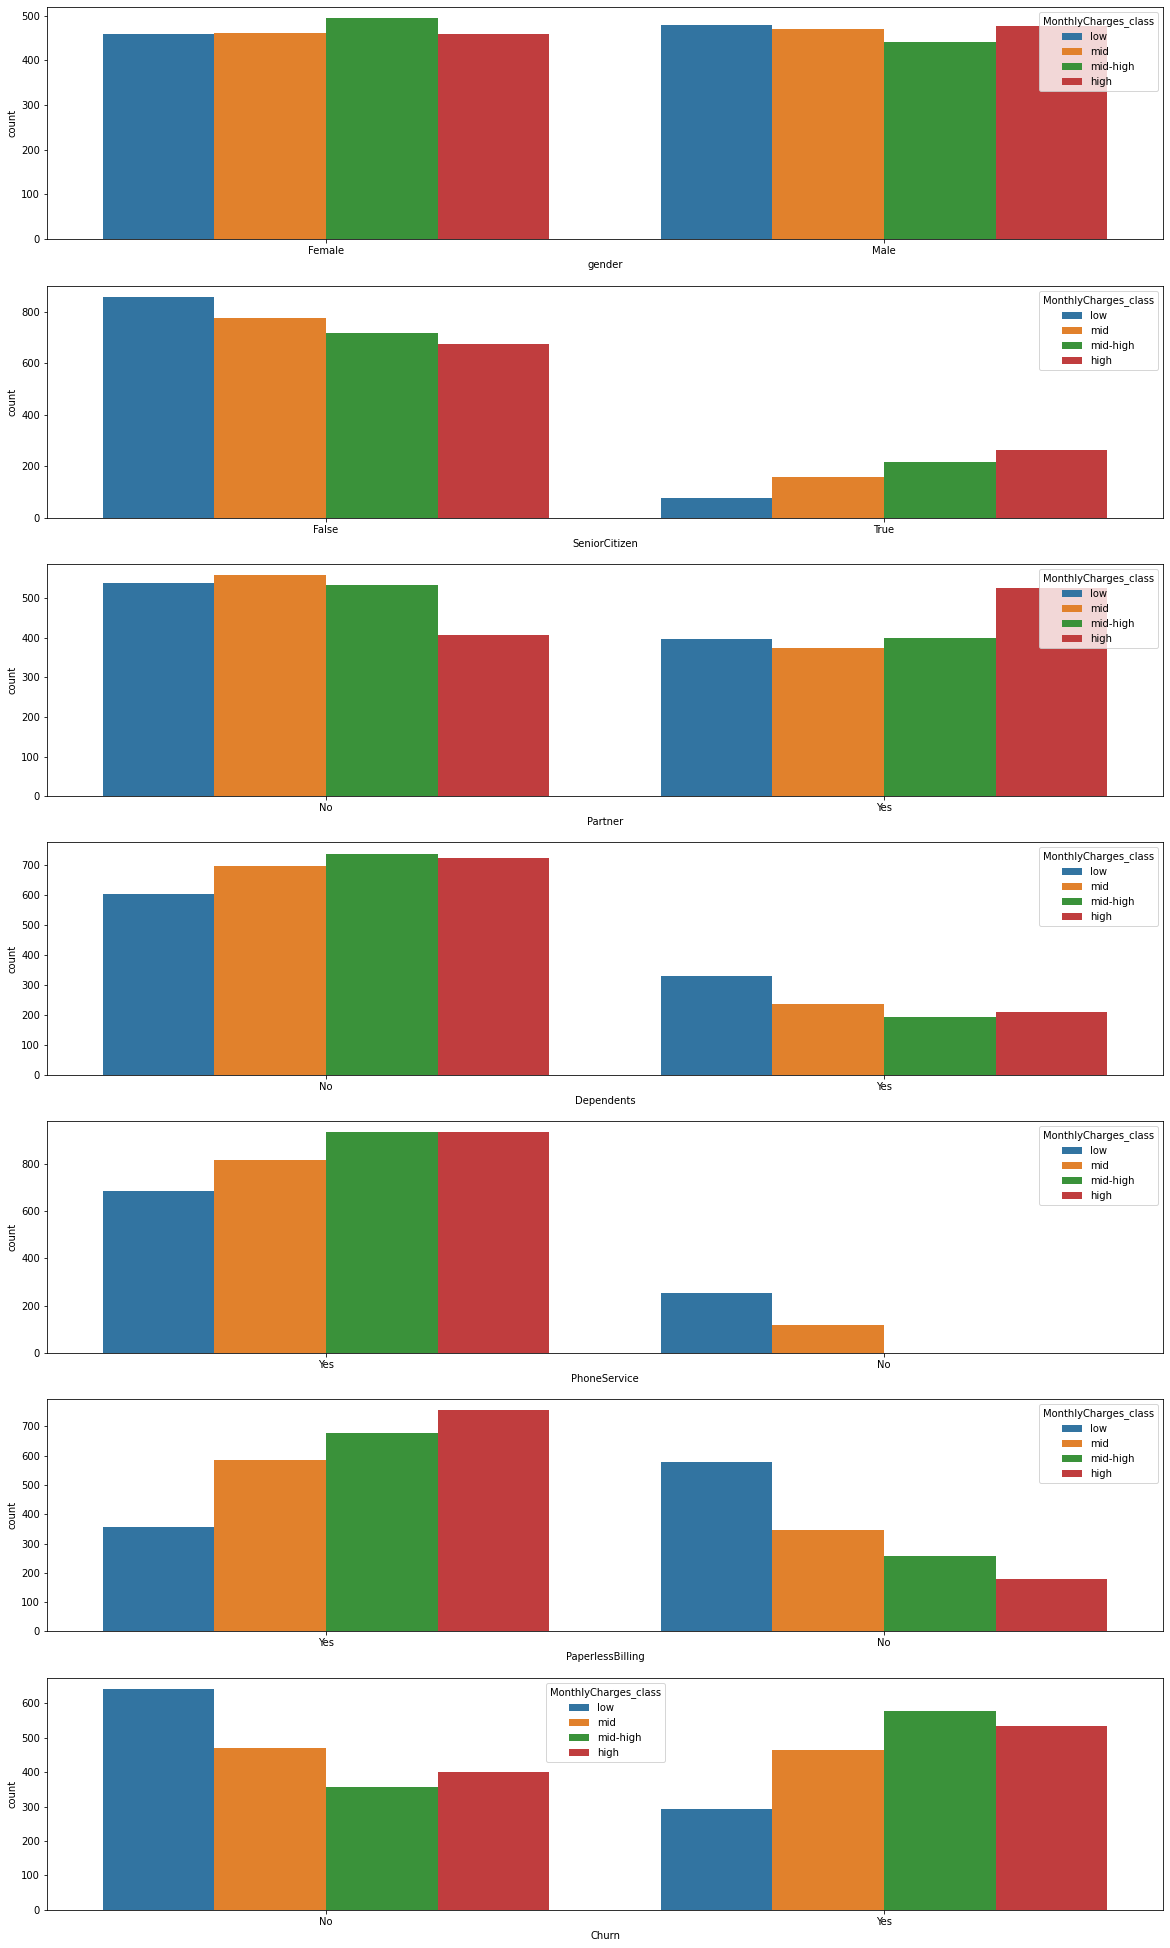

In [ ]:
target_col = bool_col
fig, axs = plt.subplots(len(target_col),figsize=(20,len(target_col)*5))
for i in range(len(target_col)):
  sns.countplot(x=df_a[target_col[i]],hue=df_a['MonthlyCharges_class'],ax=axs[i])
plt.show()

### People with High and Low Total Charges

In [ ]:
...

Ellipsis

### We must see what are the diff on people that are not churn with similar tenure value to the churn

# Preprocessing

Tasks in data preprocessing
- Data Cleaning: It is also known as scrubbing. This task involves filling of missing values, smoothing or removing noisy data and outliers along with resolving inconsistencies.
- Data Integration: This task involves integrating data from multiple sources such as databases (relational and non-relational), data cubes, files, etc. The data sources can be homogeneous or heterogeneous. The data obtained from the sources can be structured, unstructured or semi-structured in format.
- Data Transformation: This involves normalisation and aggregation of data according to the needs of the data set.
- Data Reduction: During this step data is reduced. The number of records or the number of attributes or dimensions can be reduced. Reduction is performed by keeping in mind that reduced data should produce the same results as original data.
- Data Discretization: It is considered as a part of data reduction. The numerical attributes are replaced with nominal ones.

read more on here : https://towardsdatascience.com/data-preprocessing-e2b0bed4c7fb#:~:text=Tasks%20in%20data%20preprocessing,outliers%20along%20with%20resolving%20inconsistencies.

but depending on the data we have, we dont always need to do all of them

## Cleaning

In [ ]:
# remove nan
# we just drop em cause the number of nan was only 7
df_clean = df.dropna()

In [ ]:
# remove unnesecery column
df_clean = df_clean.drop(['customerID'],axis=1)
df_clean = df_clean.drop(df.columns[-3:],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale_obj_dict = {}
for col in numerical_col:
  scale_obj_dict[col] = MinMaxScaler()
  df_clean[col] = scale_obj_dict[col].fit_transform(df_clean[[col]].values)

## Encode

In [ ]:
df_clean.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_encode = pd.get_dummies(df_clean, columns=categorical_col)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

for col in bool_col:
  df_encode[col] = lb.fit_transform(df_encode[col])

In [ ]:
df_encode

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,1,0.115423,0.001275,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,0.385075,0.215867,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,0.239303,0.210241,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,1,0.521891,0.015330,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,0.662189,0.227521,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0.845274,0.847461,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,0.140845,0,1,0.112935,0.037809,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.042254,1,1,0.558706,0.033210,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


## Fixing Imbalance Data

In [ ]:
# check version number
import imblearn
print(imblearn.__version__)

0.8.1


TODO : do detail explanation on SMOTE and do it on this data

In [ ]:
# The original paper on SMOTE suggested combining SMOTE with random undersampling of the majority class.
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# transform the dataset
oversample = SMOTE()
under = RandomUnderSampler(sampling_strategy=1)
y = df_encode['Churn']
X = df_encode.drop(['Churn'],axis=1)
X, y = oversample.fit_resample(X, y)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5163]
 [   1 5163]]


<img src="https://a.pinatafarm.com/1356x1164/4bcc6772e4/thanos-perfectly-balanced-as-all-things-should-be.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;"
     width="500px"/>

# Modeling : Straight Foward Method

so with what we have here we can do a straight foward method, which is just use all the data and encode it all
it is wiser to remove the highly coralated data, but lets try a straight foward method first just to see what we can achive

## RF Model

In [ ]:
# df_ml = df_encode

In [ ]:
# y = df_ml['Churn']
# X = df_ml.drop(['Churn'],axis=1)

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8373143963847643


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.86      0.82      0.84      1613
       Churn       0.82      0.85      0.83      1485

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098



## Using Lazypredict library

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Running the Lazypredict library and fit multiple regression libraries
# for the same dataset
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
 models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:38<00:00,  1.31s/it]


In [ ]:
# Calculate performance of all models on test dataset
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.84,0.85,0.85,0.84,2.49
LGBMClassifier,0.84,0.84,0.84,0.84,0.35
ExtraTreesClassifier,0.84,0.84,0.84,0.84,0.72
CalibratedClassifierCV,0.83,0.83,0.83,0.83,3.01
LogisticRegression,0.83,0.83,0.83,0.83,0.31
LinearSVC,0.83,0.83,0.83,0.83,1.55
SVC,0.83,0.83,0.83,0.83,4.70
BaggingClassifier,0.82,0.82,0.82,0.82,0.30
XGBClassifier,0.82,0.82,0.82,0.82,1.33


In [ ]:
model_dictionary

{'AdaBoostClassifier': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('numeric',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
        'MultipleLines_No', 'MultipleLines_No phone service',
        'MultipleLines_Yes', '...
                                                                    SimpleImputer(fill_value='missing',
                                                                                  strategy='constant')),
                                               

# Not finish, even thou the model achive a high score, we can get more on the data, we can find pattern and insight, we can tweak the data more on the prprocessor type and we can create some interesting feature. i will continue more on this notebook later

# and ofc there is better data or the sequal to this current data, go check here : https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113